# From Data to Action: Machine Learning Approaches for Predicting Tobacco-Free Policy Implementation in Schools 
## Logistic Regression - High Correlation Features from Heat Map

Loading imputed dataset

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
import statsmodels.api as sm
import scipy.stats as st
from firthlogist import FirthLogisticRegression

%matplotlib ipympl
plt.rcParams['xtick.major.pad']='4'
plt.rcParams['ytick.major.pad']='4'
plt.rcParams["font.family"] = "sans-serif"
plt.style.use("seaborn-poster")

IMAGES_PATH = Path() / "plots"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Read the two dataframes
df = pd.read_csv('/main/tobaccoFree/data/imputed_data2.csv')


df.head()

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


,Dist,Q1,Q2,Q3,Q4,Q5A,Q6,Q7,Q8,Q9,Q10,Q11,totalCriteria,totalPop2011,adolescentPop,youthPopn,SCPropRURAL,SCPropURBAN,SCPropTOTAL,STPropRURAL,STPropURBAN,STPropTOTAL,GDDP_curr,NDDP_curr,GDDP_const,NDDP_const,pcNDDP,avg_MPCE_RURAL,foodShareExpenseRURAL,avg_MPCE_URBAN,foodShareExpenseURBAN,rationYBPL,rationYAAY,rationSAPL,rationAnna,rationWhite,totRC,avg_pccRURAL,iopRURAL,LzRatioRURAL,avg_pccURBAN,iopURBAN,LzRatioURBAN,TotRdLength,APPTWAMainW,APPTWAMarginalW,youthPopAsWorker,youthPopAsMWorker,HDI_2001,HDI_2011,HDIRS_2001,HDIRS_2011,IMR_2010,pcHealthExpenseRURAL,pcHealthExpenseRURALURBAN,popPerSubCentre,popPerPHC,popPerRH,popPerGovBed,sex_ratio_dist,POAGHF,POAPHF,POACBS,anyANC,fullNatalCare,pWomenHospDeliveries,homeDeliveries,homeDeliveries_assist,percSafeDeliveries,childSexRatio,avgHHperNH,avgHHperHH,litRateM,litRateF,litRateT,litRateSC,litRateSC.1,APL,youthPopLit,SHSAP,secondarySec,ROSWUPSTSS,numSchoolsTot,numGovSchools,numPrivASchools,numPrivNASchools,percHH_Has_TapWtr,unemploymentRT,percPassSSC,EngMedium,SchoolInfrastructure,numRoom,haveComputer,haveInternet,haveELearning,haveToilets,haveToiletsF,playground,sports,extraCurrLevel,localTrust,ruleFollow,remark,prcplGender,prcplAge,prcplMaritalStatus,prcplIfChild,prcplSpouseEdu,prcplSpouseWork,prcplSpouseOccu,prcplEdu,prcplScheme,prcplEduYear,prcplSchemeOther,prcplWorkYear,prcplWorkYearOther,prcplInternetSavy,prcplSmartPhone,prcplUsedTobacco,prcplUsingTobacco,prcplUsingQuan,prcplchoolAward,numGuestLec,tbccoUseProb,tbccoFreeGood,staffNotDemandTF,staffNotForceStopTbcco,isTrusteesActive,BlockStaffCom,BlockStaffHelpTF,staffReceivdTrainTF,schoolLeadsExCuPr,isChangeDifficult,isChangeEasy,teachDiscChallenges,canDiscChangeTeach,mstTeachNotInterest,mstTeachPrivateLessons,mstTeachGoodAcademics,mstTeachGoodExCurr,mstTeachSelfDevelopment,mstTeachParticipateExCurr,teachNeedReminders,mstParentsSchoolEvents,parentsTbccoBigThreat,mstParentsReqTF,teachNumTraining,teachAwardsGov,isPTA,parentEduLevl,numBlank,tobaccoFree
0,13.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,2822.0,18.3,18.2,12.0,14.0,12.5,0.6,0.8,0.6,34117.0,31070.0,20042.0,18153.0,103588.0,583.9,55.7,685.9,53.0,69604.0,35605.0,486125.0,1007.0,73360.0,665701.0,583.9,12.1,33.9,685.9,61.7,34.1,10245.0,3.6,1.2,11.4,2.4,0.7,0.7,3.0,3.0,20.0,131.0,355.0,6963.0,37767.0,148549.0,2176.3,966.0,47.8,55.0,1.4,97.3,49.7,76.1,24.3,2.8,78.9,867.0,4.7,3.6,88.2,74.6,81.5,78.0,76.2,96.1,95.1,1157.0,602.0,1.9,615.0,2.0,528.0,85.0,67.3,706036.0,94.4,2.0,0.0,7.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,38.0,3.0,2.0,1.0,2.0,6.0,2.0,2.0,2.0,2.0,7.0,4.0,3.0,2.0,2.0,2.0,1.927492,3.000000,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,2.0,8.0,1.0,1.0,7.0,16.0,1.0
1,13.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,2822.0,18.3,18.2,12.0,14.0,12.5,0.6,0.8,0.6,34117.0,31070.0,20042.0,18153.0,103588.0,583.9,55.7,685.9,53.0,69604.0,35605.0,486125.0,1007.0,73360.0,665701.0,583.9,12.1,33.9,685.9,61.7,34.1,10245.0,3.6,1.2,11.4,2.4,0.7,0.7,3.0,3.0,20.0,131.0,355.0,6963.0,37767.0,148549.0,2176.3,966.0,47.8,55.0,1.4,97.3,49.7,76.1,24.3,2.8,78.9,867.0,4.7,3.6,88.2,74.6,81.5,78.0,76.2,96.1,95.1,1157.0,602.0,1.9,615.0,2.0,528.0,85.0,67.3,706036.0,94.4,2.0,0.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,0.0,1.0,0.0,1.0,57.0,3.0,1.0,0.0,2.0,6.0,2.0,2.0,2.0,2.0,13.0,2.0,3.0,2.0,2.0,2.0,1.927492,1.000000,3.0,1.0,2.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,7.0,16.0,1.0
2,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,3876.0,17.9,18.4,13.4,12.1,13.0,0.8,0.6,0.8,54630.0,49525.0,33079.0,29789.0,119783.0,626.7,54.0,873.2,47.2,148371.0,56286.0,641442.0,181.0,93708.0,939988.0,626.7,10.6,36.5,873.2,40.1,38.1,7758.0,2.9,1.1,10.7,2.5,0.7,0.8,3.0,3.0,22.0,153.0,201.0,6722.0,38560.0,138814.0,1865.5,957.0,39.0,64.4,0.8,97.4,37.4,89.0,10.1,3.6,92.6,863.0,4.6,3.4,88.6,74.2,81.5,77.8,80.0,96.1,95.5,1675.0,867.0,1.9,847.0,11.0,690.0,146.0,85.4,990339.0,95.6,2.0,0.0,10.0,2.0,2.0,2.0

In [ ]:

correlations = df.corr()['tobaccoFree']


filtered_correlations = correlations[abs(correlations) >= 0.3]


variable_names = filtered_correlations.index.tolist()

variable_names

Heat map for knn imputed data

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df_filter.corr(numeric_only=True)), annot=True, annot_kws={"size": 6}, cmap="YlGnBu")
save_fig('Heat Map_filterh3')

Filtering to only use the top 3 correlated variables chosen for model recreation

In [2]:
#df_filter = df.filter(["Dist", "Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "totalCriteria", "percCriteria", "rationYAAY", "EngMedium_Eng", "EngMedium_Marathi", "SchoolInfra_Pucca", "localTrust_active", "ruleFollow_proactive", "remark_active", "prcplIfChild", "prcplSpouseWork", "prcplEdu_HSC", "prcplSchemeOther", "isChangeDifficult", "mstTeachNotInterest", "mstTeachPrivateLessons_4.0", "teachNumTraining", "parentEduLevl_secondary", "localTrust_passive", "ruleFollow_passive", "remark_passive", "IMR_2010", "perPassSSC", "haveInternet", "prcplSpouseEdu", "prcplInternetSavy", "prcplchoolAward", "staffNotForcenStopTbcco", "staffRecievdTrainTF", "mstTeachGoodAcademics", "mstTeachParticipatedExCurr", "mstParentsSchoolEvents", "parentsTbccoBigThreat", 'tobaccoFree'])
#df_filter = df.filter(variable_names)
#df_filter = df.filter(["ROSWUPSTSS","percPassSSC","LzRatioURBAN","unemploymentRT", "mstTeachPrivateLessons_4","rationYAAY", 'Dist_Yavatmal',"extraCurrLevel_Cluster Level ", 'extraCurrLevel_none', "numBlank ", "prcplSpouseEdu_none","prcplSpouseOccu_House Wife", "tobaccoFree"])
#df_filter = df.filter(["ROSWUPSTSS","percPassSSC","rationYAAY", 'Dist_Yavatmal',"extraCurrLevel_Cluster Level ", 'extraCurrLevel_none', "numBlank ", "prcplSpouseEdu_none","prcplSpouseOccu_House Wife", "tobaccoFree"])
df_filter = df.filter(["totalCriteria","Dist","tobaccoFree"])
#df_filter = df
df_filter.info(verbose=True,show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   totalCriteria  611 non-null    float64
 1   Dist           611 non-null    float64
 2   tobaccoFree    611 non-null    float64
dtypes: float64(3)
memory usage: 14.4 KB


In [ ]:
df_filter.info(verbose=True,show_counts=True)

AutoViz library plots for features

In [ ]:
AV = AutoViz_Class()
# %matplotlib inline
viz = AV.AutoViz(filename='', dfte=df_filter, sep=',', depVar='tobaccoFree', chart_format ='html', verbose=2, save_plot_dir='plots/html')

## Preparing for the model

In [ ]:

df_filter.hist(figsize = (20,20))
plt.show()

Getting x and y variables

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = df_filter.drop(['tobaccoFree'], axis=1)
y = df_filter['tobaccoFree']



Original frequency histogram

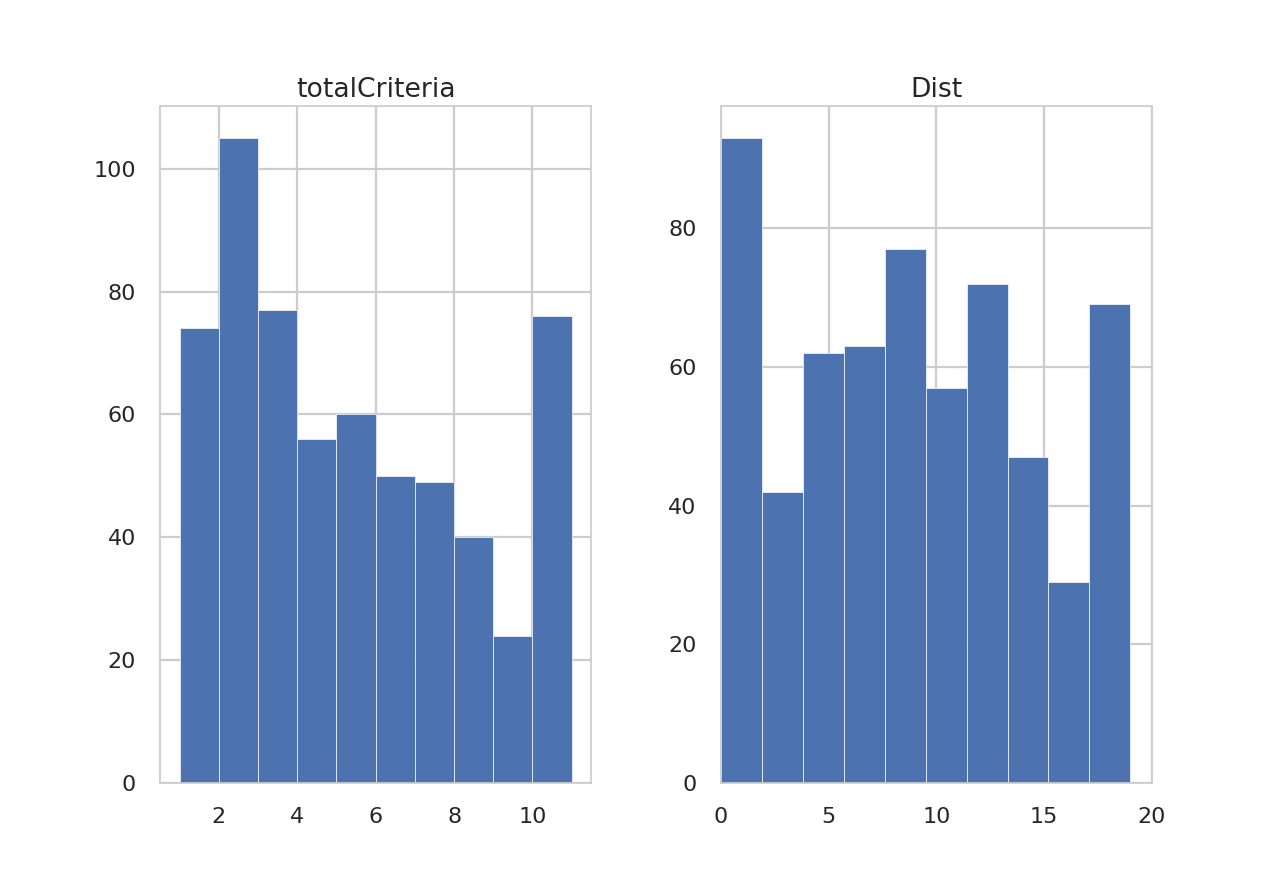

In [10]:
X.hist()
#save_fig("unscaled_bar_plot")  
plt.xlim(0,20)
plt.show()

Scaling features data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Scaled frequency histogram

In [ ]:
X.hist(figsize = (30,20))
save_fig("scaled_bar_plot")  
plt.show()

*scaliling with standardization allows for faster convergence by setting mean to 0 and std dev to 1*

## Training Model

### Firth Logistic Regression Model

train test split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


Training model

In [ ]:
from firthlogist import FirthLogisticRegression
firth = FirthLogisticRegression(max_iter=1000)
firth.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))
print(firth.summary())

In [ ]:
from sklearn.metrics import accuracy_score
yhat = firth.predict(X_test)
prediction = list(map(round, yhat))
print('Actual values', list(y_test.values)) 
print('Predictions :', prediction) 
print('Test accuracy = ', accuracy_score(y_test, prediction))

### Statsmodels Logistic Regression Model

Adding constant to x

In [ ]:
X = sm.add_constant(X)

train test split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


Training model

In [ ]:
#smmodel=sm.Logit(y_train,X_train)

smmodel=sm.GLM(y_train, X_train, family=sm.families.Binomial())
result=smmodel.fit()


Model Summary \
*summary tells us possible quasi-complete separation most likeley due to variables with high levels of collinearity. Those variables should be dropped* 

In [ ]:
print(result.summary())

In [ ]:
from sklearn.metrics import accuracy_score
yhat = result.predict(X_test)
prediction = list(map(round, yhat))
print('Actual values', list(y_test.values)) 
print('Predictions :', prediction) 
print('Test accuracy = ', accuracy_score(y_test, prediction))

*Refresh before running next model*

### Statsmodels GLM Logit Model

Adding constant to x

In [ ]:
X = sm.add_constant(X)

train test split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)


Training model

In [ ]:
smmodel=sm.GLM(y_train, X_train, family=sm.families.Binomial())
result=smmodel.fit()


Model Summary

In [ ]:
print(result.summary())

In [ ]:
from sklearn.metrics import accuracy_score
yhat = result.predict(X_test)
yhat1 = result.predict(X_train)
prediction = list(map(round, yhat))
prediction1 = list(map(round, yhat1))
print('Actual values', list(y_test.values.astype(int))) 
print('Predictions :', prediction) 
print('Test accuracy = ', accuracy_score(y_test, prediction))
print('Train accuracy = ', accuracy_score(y_train, prediction1))

*Refresh before running next model*

### Sklearn Logistic Regression Model

train test split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)



Training model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000,penalty=None)
model.fit(X_train, y_train)

Get accuracy scores

In [ ]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Model Confussion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

Plotting confusion matrix heatmap

In [ ]:


fig, ax = plt.subplots(figsize=(30,20))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predicted Positive', 'Predicted Negative'])

sns.heatmap(cm_matrix, linewidths=2, ax=ax, annot=True, annot_kws={"size": 54}, fmt='d', cmap="YlGnBu")

plt.setp( ax.get_xticklabels() + ax.get_yticklabels(), visible=False)
# plt.xticks(fontsize=54)  # Adjust font size as needed
# plt.yticks(fontsize=54)  # Adjust font size as needed
#plt.suptitle("Visualizing Logistic Regression Model's Confusion Matrix", fontsize=72, y=1)
ax.set_title("Visualizing Logistic Regression Model's\n Confusion Matrix", pad=25, size=72)
ax.text(.25, 1.35, "False Negative", fontsize=64)
ax.text(.25, .35, 'Actual Positive', fontsize=64, color='white')
ax.text(1.25, 1.35, "Actual Negative", fontsize=64)
ax.text(1.25, .35, 'False Positive', fontsize=64)
#ax.tick_params(labelsize=54)
ax.text(1.05, 1.1, f"The acuuracy of the model\n= TP+TN/(TP+TN+FP+FN)\n= {(TP+TN)/float(TP+TN+FP+FN):.3f}", fontsize=44, bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))



ax.title.set_fontweight('bold')
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=54)
save_fig('Heat Map_confusion')

# plt.show()

Complete accuracy scores

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

In [ ]:
y_pred_prob=model.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no TFS (0)','Prob of TFS (1)'])
y_pred_prob_df.head()

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=model.predict_proba(X_test)[:,1]
    y_pred_prob_yes = y_pred_prob_yes.reshape(-1,1)
    y_pred2=binarize(y_pred_prob_yes,threshold=i/10)
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'False Negatives','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

In [ ]:
y_test.value_counts()

In [ ]:
null_accuracy = (111/(111+12))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2', 'None']}, 
              {'C':[.01,.05,.1,.5,1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

ROC Plot + Area Under Curve score

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_yes=model.predict_proba(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
roc_auc = roc_auc_score(y_test,y_pred_prob_yes[:,1])

plt.figure(figsize=(20,20))
plt.plot(fpr,tpr)

plt.fill_between(fpr, tpr, 0, alpha=0.3,color='lightblue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.title('ROC curve for TFS classifier')
plt.xlabel('False positive rate (1-Specificity)',fontsize=54)
plt.ylabel('True positive rate (Sensitivity)',fontsize=54)
plt.title('ROC Curve For\n Logistic Regression Model', pad=25, size=72,fontweight='bold')
plt.text(0.1, 0.4, f'ROC Area Under Curve: {roc_auc:.3f}', fontsize=54, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.grid(True)
save_fig('roc')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob_yes=model.predict_proba(X_test)
roc_auc_score(y_test,y_pred_prob_yes[:,1])